# Exploration of Pisa Data
## by Jannik Hehemann

## Preliminary Wrangling

> The dataset I will explore and analyze in this project is a dataset of a PISA study, where information about students all over the world are were gathered. The information contain individual learning attitudes and skills as well as socio-economic, psychological and other environmental factors. I want to investigate correlations between learning success (grades) and origin as well as gender.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

%matplotlib inline

> Firstly I load in the pisa-dataset and describe its properties through the questions below.

In [2]:
pisa_raw = pd.read_csv('pisa2012.csv', encoding='latin-1')
pisa_raw.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


### What is the structure of your dataset?



In [3]:
pisa_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


#### This dataset has 485490 entries (rows) with 636 columns describing the data. The datatypes in this dataset are 250 float64, 18 int64 and 368 object. 

In [4]:
# international grade
pisa_raw['ST01Q01'].describe()

count    485490.000000
mean          9.813323
std           3.734726
min           7.000000
25%           9.000000
50%          10.000000
75%          10.000000
max          96.000000
Name: ST01Q01, dtype: float64

In [5]:
# Highest educational level of parents
pisa_raw['HISCED'].value_counts()

ISCED 5A, 6          159942
ISCED 3A, ISCED 4    123304
ISCED 5B              74131
ISCED 2               51506
ISCED 3B, C           30469
ISCED 1               25284
None                   8455
Name: HISCED, dtype: int64

In [6]:
# Highest parental occupational status
pisa_raw['HISEI'].describe()

count    450621.000000
mean         48.923298
std          22.120953
min          11.010000
25%          28.520000
50%          48.820000
75%          70.340000
max          88.960000
Name: HISEI, dtype: float64

In [7]:
# Immigration status
pisa_raw['IMMIG'].value_counts()

Native               417347
Second-Generation     28268
First-Generation      26178
Name: IMMIG, dtype: int64

In [8]:
# gender
pisa_raw['ST04Q01'].value_counts()

Female    245064
Male      240426
Name: ST04Q01, dtype: int64

In [9]:
# sense of belonging to school
pisa_raw['BELONG'].describe()

count    313399.000000
mean         -0.022259
std           0.983503
min          -3.690000
25%          -0.740000
50%          -0.150000
75%           0.560000
max           2.630000
Name: BELONG, dtype: float64

In [10]:
# Index of economic, social and cultural status
pisa_raw['ESCS'].describe()

count    473648.000000
mean         -0.265546
std           1.131791
min          -5.950000
25%          -1.000000
50%          -0.190000
75%           0.610000
max           3.690000
Name: ESCS, dtype: float64

In [11]:
pisa_raw['ESCS'].isnull().sum()

11842

### What is/are the main feature(s) of interest in your dataset?
- ST01Q01 - International Grade
- GRADE - Grade compared to modal grade in country
- ESCS - Index of economic, social and cultural status


Is there a difference between the grades of a students with immigration background. What additionall acculturation features might correlate with that.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


- OECD - OECD country
- CNT - Country code 3-character
- ST04Q01 - Gender
- IMMIG - Immigration status

## Univariate Exploration

> In this section, I investigate distributions of individual variables. If
I see unusual points or outliers, I will take a deeper look to clean things up
and prepare myself to look at relationships between variables. Before I start I will drop columns that I don't need.

In [12]:
# keep columns of interest
pisa = pisa_raw[['ST01Q01', 'GRADE', 'IMMIG', 'ESCS', 'OECD', 'CNT', 'ST04Q01']].copy()

In [69]:
pisa.shape

(485490, 7)

In [68]:
# How many null values are in each column
pisa.isnull().sum()

ST01Q01        0
GRADE        873
IMMIG      13697
ESCS       11842
OECD           0
CNT            0
ST04Q01        0
dtype: int64

In [73]:
# dropping rows where any of the cells have a null value
pisa.dropna(inplace = True)
pisa.shape

(464282, 7)

In [74]:
pisa.isnull().sum()

ST01Q01    0
GRADE      0
IMMIG      0
ESCS       0
OECD       0
CNT        0
ST04Q01    0
dtype: int64

### International Grade

> I will start the exploration by looking at some general features of the variable using the functions `describe()` `value_counts()` and `head()`.

In [14]:
pisa['ST01Q01'].describe()

count    485490.000000
mean          9.813323
std           3.734726
min           7.000000
25%           9.000000
50%          10.000000
75%          10.000000
max          96.000000
Name: ST01Q01, dtype: float64

In [15]:
pisa['ST01Q01'].value_counts()

10    262631
9     152850
11     38397
8      23764
7       3536
12      3436
96       873
13         3
Name: ST01Q01, dtype: int64

In [16]:
pisa['ST01Q01'].head()

0    10
1    10
2     9
3     9
4     9
Name: ST01Q01, dtype: int64

>The variable is of type integer, has its minimum at 7 and its maximum at 96. The `value_counts`funcion revealed that the value 96 are outliers. I am going to visualize the distribution in a histogram in the next step.

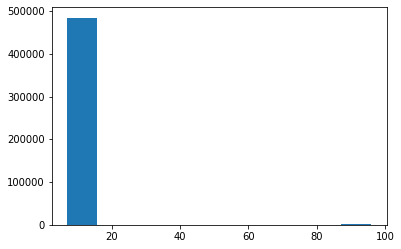

In [17]:
# plotting histogram of international grades distribution
plt.hist(data = pisa, x = 'ST01Q01');

>The histogram confirmed what the data indicated. For better visualization I will rescale the x axis with `log10`.

In [18]:
np.log10(pisa['ST01Q01'].describe())

count    5.686180
mean     0.991816
std      0.572259
min      0.845098
25%      0.954243
50%      1.000000
75%      1.000000
max      1.982271
Name: ST01Q01, dtype: float64

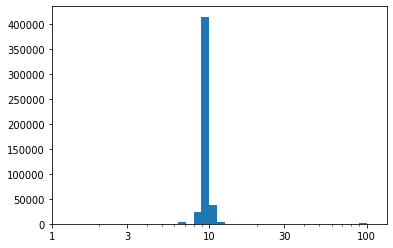

In [19]:
# rescale the histogram
bins = 10 ** np.arange(0.5, 2+0.1, 0.05)
ticks = [1, 3, 10, 30, 100]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pisa, x = 'ST01Q01', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);

> The histogram looks better, but can still be optimized for better consumption. In the next visualization I will ignore the outliers of value 96 and plot a histogram without a scaled but with a limited range on the x-axis.

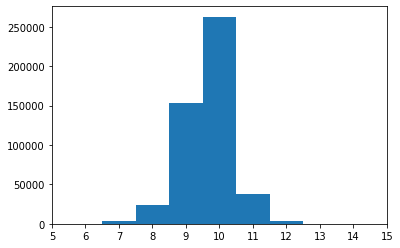

In [20]:
# exclude the outliers (score 96) and zoom into the interesting part
# change bin size, axis limits and axis ticks
bins = np.arange(0.5, pisa['ST01Q01'].max()+0.5, 1)
plt.hist(data = pisa, x = 'ST01Q01', bins = bins);
plt.xticks(np.arange(1, 21, 1));
plt.xlim((5,15));


> This looks quite nice. The histogram shows that the data is rather normally distributed and has its peak at 10. For better comparism I will plot the two histograms with the differend scaled and ranges of x-axis in one figure with subplots.

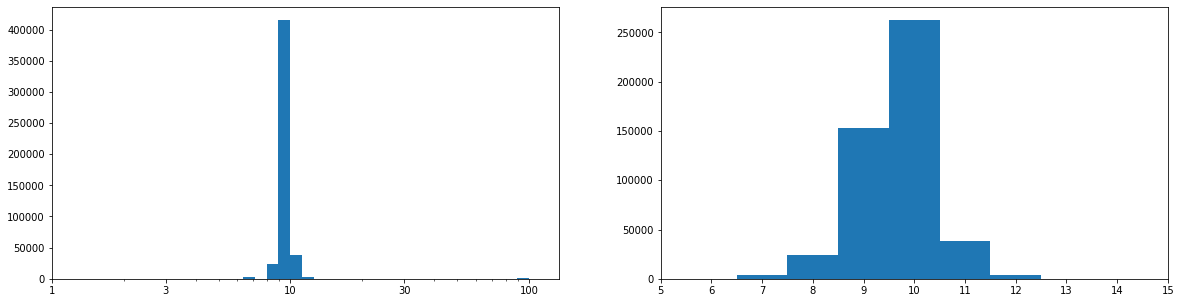

In [21]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = 10 ** np.arange(0.5, 2+0.1, 0.05)
ticks = [1, 3, 10, 30, 100]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pisa, x = 'ST01Q01', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0.5, pisa['ST01Q01'].max()+0.5, 1)
plt.hist(data = pisa, x = 'ST01Q01', bins = bins);
plt.xticks(np.arange(1, 21, 1));
plt.xlim((5,15));

### Grade compared to modal grade in country

> I will start the exploration by looking at some general features of the variable using the functions `describe()` `value_counts()` and `head()`.

In [22]:
pisa['GRADE'].describe()

count    484617.000000
mean         -0.162964
std           0.655558
min          -3.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: GRADE, dtype: float64

In [23]:
pisa['GRADE'].value_counts()

 0.0    348298
-1.0     76159
 1.0     39179
-2.0     15528
-3.0      4370
 2.0      1078
 3.0         5
Name: GRADE, dtype: int64

In [24]:
pisa['GRADE'].head()

0    0.0
1    0.0
2   -1.0
3   -1.0
4   -1.0
Name: GRADE, dtype: float64

> The variable is of type float, has its minimum at -3 and its maximum at 3. I am going to visualize the distribution in a histogram in the next step.

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


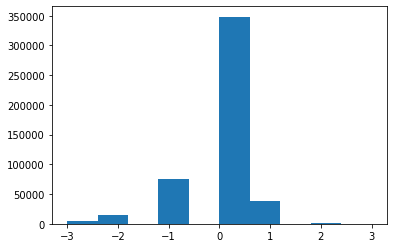

In [25]:
# plotting histogram of grades compared to modal grade in country
plt.hist(data = pisa, x = 'GRADE');

> The visualization is not very nice, so I will change the bin size and the x-labels in the next visualization for better consumption. 

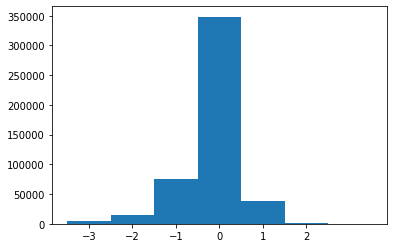

In [26]:
# change bin size
bins = np.arange(-3.5, pisa['GRADE'].max()+1, 1)
plt.hist(data = pisa, x = 'GRADE', bins = bins);
plt.xticks(np.arange(-3, 3, 1));

> The histogram shows that the data is rather normally distributed and has its peak at 0.

### OECD Status

The next variable I will have a look at is the countries' OECD status by looking at some general features of the variable using the functions `describe()` `value_counts()` and `head()`.

In [27]:
pisa['OECD'].describe()

count     485490
unique         2
top         OECD
freq      295416
Name: OECD, dtype: object

In [28]:
pisa['OECD'].value_counts()

OECD        295416
Non-OECD    190074
Name: OECD, dtype: int64

In [29]:
pisa['OECD'].head()

0    Non-OECD
1    Non-OECD
2    Non-OECD
3    Non-OECD
4    Non-OECD
Name: OECD, dtype: object

> The variable is of type object and has two dimensions 'OECD' and 'Non-OECD'. In order to have a look at the distribution between these two values I will plot a pie chart. 

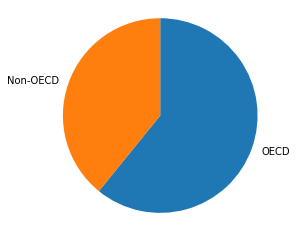

In [30]:
# overview of the distribution of OECD countrys vs non-OECD countries
sorted_counts = pisa['OECD'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

> The data shows that roughly 60% of the countries have a OECD status.

### Immigration status

> The next variable I will have a look at is the students' immigration status by looking at some general features of the variable using the functions `describe()` `value_counts()` and `head()`.

In [31]:
pisa['IMMIG'].describe()

count     471793
unique         3
top       Native
freq      417347
Name: IMMIG, dtype: object

In [32]:
pisa['IMMIG'].value_counts()

Native               417347
Second-Generation     28268
First-Generation      26178
Name: IMMIG, dtype: int64

In [33]:
pisa['IMMIG'].head()

0    Native
1    Native
2    Native
3    Native
4    Native
Name: IMMIG, dtype: object

> The variable is of type object and has three dimensions 'Native', 'First-Generation' and 'Second-Generation'. In order to have a look at the distribution between these three values I will plot a pie chart. 

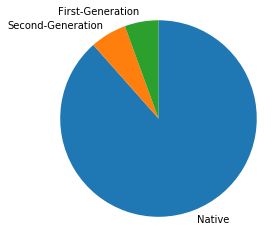

In [34]:
# overview of the distribution of the immigration status
sorted_counts = pisa['IMMIG'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

> The data shows that roughly 90% of the students are native, 5% have an immigration status of 'First-Generation' and 5% of 'Second-Generation'.

### Gender

> The next variable I will have a look at is the students gender by looking at some general features of the variable using the functions `describe()` `value_counts()` and `head()`.

In [35]:
pisa['ST04Q01'].describe()

count     485490
unique         2
top       Female
freq      245064
Name: ST04Q01, dtype: object

In [36]:
pisa['ST04Q01'].value_counts()

Female    245064
Male      240426
Name: ST04Q01, dtype: int64

In [37]:
pisa['ST04Q01'].head()

0    Female
1    Female
2    Female
3    Female
4    Female
Name: ST04Q01, dtype: object

> The variable is of type object and has two dimensions 'Male' and 'Female'. In order to have a look at the distribution between these two values I will plot a pie chart. 

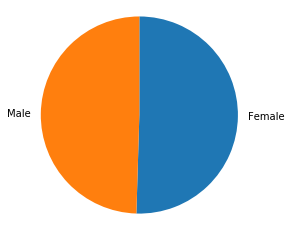

In [38]:
# overview of the distribution of the immigration status
sorted_counts = pisa['ST04Q01'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

> The data shows that both genders are evenly represented in the data.  

### Country code 3-character

> The next variable I will have a look at is the country code by looking at some general features of the variable using the functions `describe()` `value_counts()` and `head()`.

In [39]:
pisa['CNT'].describe()

count     485490
unique        68
top       Mexico
freq       33806
Name: CNT, dtype: object

In [40]:
pisa['CNT'].value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
                            ...  
Florida (USA)                1896
Perm(Russian Federation)     1761
Massachusetts (USA)          1723
Connecticut (USA)            1697
Liechtenstein                 293
Name: CNT, Length: 68, dtype: int64

> There are some entries for states that belong to the USA. Let's have a deeper look at the CNT values.

In [41]:
# Get all the CNT values in one list
pisa['CNT'].value_counts().index.sort_values()

Index(['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China-Shanghai', 'Chinese Taipei',
       'Colombia', 'Connecticut (USA)', 'Costa Rica', 'Croatia',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'Florida (USA)',
       'France', 'Germany', 'Greece', 'Hong Kong-China', 'Hungary', 'Iceland',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Korea', 'Latvia', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Macao-China', 'Malaysia', 'Massachusetts (USA)',
       'Mexico', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway',
       'Perm(Russian Federation)', 'Peru', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russian Federation', 'Serbia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Tunisia', 'Turkey', 'United Arab Emirates',
       'United Kingdom', 'United States of America', 'Uruguay', 'Vietnam'],
 

#### Data cleaning

##### Define
1. 'Conneticut (USA)', 'Florida (USA)', 'Massachusetts (USA)' and 'USA' will be renamed to 'USA'.
2. 'Perm(Russian Federation)' and 'Russian Federation' will be renamed to 'Russia'
3. 'Hong Kong-China' and 'Macao-China' will be renamed to 'China'

##### Code

In [42]:
pisa['CNT'] = pisa['CNT'].replace('Connecticut (USA)', 'USA')
pisa['CNT'] = pisa['CNT'].replace('Florida (USA)', 'USA')
pisa['CNT'] = pisa['CNT'].replace('Massachusetts (USA)', 'USA')
pisa['CNT'] = pisa['CNT'].replace('United States of America', 'USA')
pisa['CNT'] = pisa['CNT'].replace('Perm(Russian Federation)', 'Russia')
pisa['CNT'] = pisa['CNT'].replace('Russian Federation', 'Russia')
pisa['CNT'] = pisa['CNT'].replace('Hong Kong-China', 'China')
pisa['CNT'] = pisa['CNT'].replace('Macao-China', 'China')

##### Test

In [43]:
pisa[pisa['CNT'] == 'Connecticut (USA)'].shape

(0, 7)

In [44]:
pisa[pisa['CNT'] == 'Florida (USA)'].shape

(0, 7)

In [45]:
pisa[pisa['CNT'] == 'Massachusetts (USA)'].shape

(0, 7)

In [46]:
pisa[pisa['CNT'] == 'United States of America'].shape

(0, 7)

In [47]:
pisa[pisa['CNT'] == 'Perm(Russian Federation)'].shape

(0, 7)

In [48]:
pisa[pisa['CNT'] == 'Russian Federation'].shape

(0, 7)

In [49]:
pisa[pisa['CNT'] == 'Hong Kong-China'].shape

(0, 7)

In [50]:
pisa[pisa['CNT'] == 'Macao-China'].shape

(0, 7)

In [51]:
pisa[pisa['CNT'] == 'USA'].shape

(10294, 7)

In [52]:
pisa[pisa['CNT'] == 'Russia'].shape

(6992, 7)

In [53]:
pisa[pisa['CNT'] == 'China'].shape

(10005, 7)

In [54]:
pisa['CNT'].value_counts()

Mexico           33806
Italy            31073
Spain            25313
Canada           21544
Brazil           19204
                 ...  
Tunisia           4407
Latvia            4306
New Zealand       4291
Iceland           3508
Liechtenstein      293
Name: CNT, Length: 63, dtype: int64

> I cleaned the issue that sometimes there were separate datapoints for the same countries. 
- The data for 'Conneticut (USA)', Florida (USA) and 'Massachusetts (USA)' have been assigned to the country 'USA' 
- Perm(Russian Federation) has been assigned to the country 'Russia'
- 'Hong Kong-China' and 'Macao-China' have been assigned to the country 'China'

> The variable is of type object and has 63 different values. In order to have a look at the distribution between these values I will plot a bar chart. 

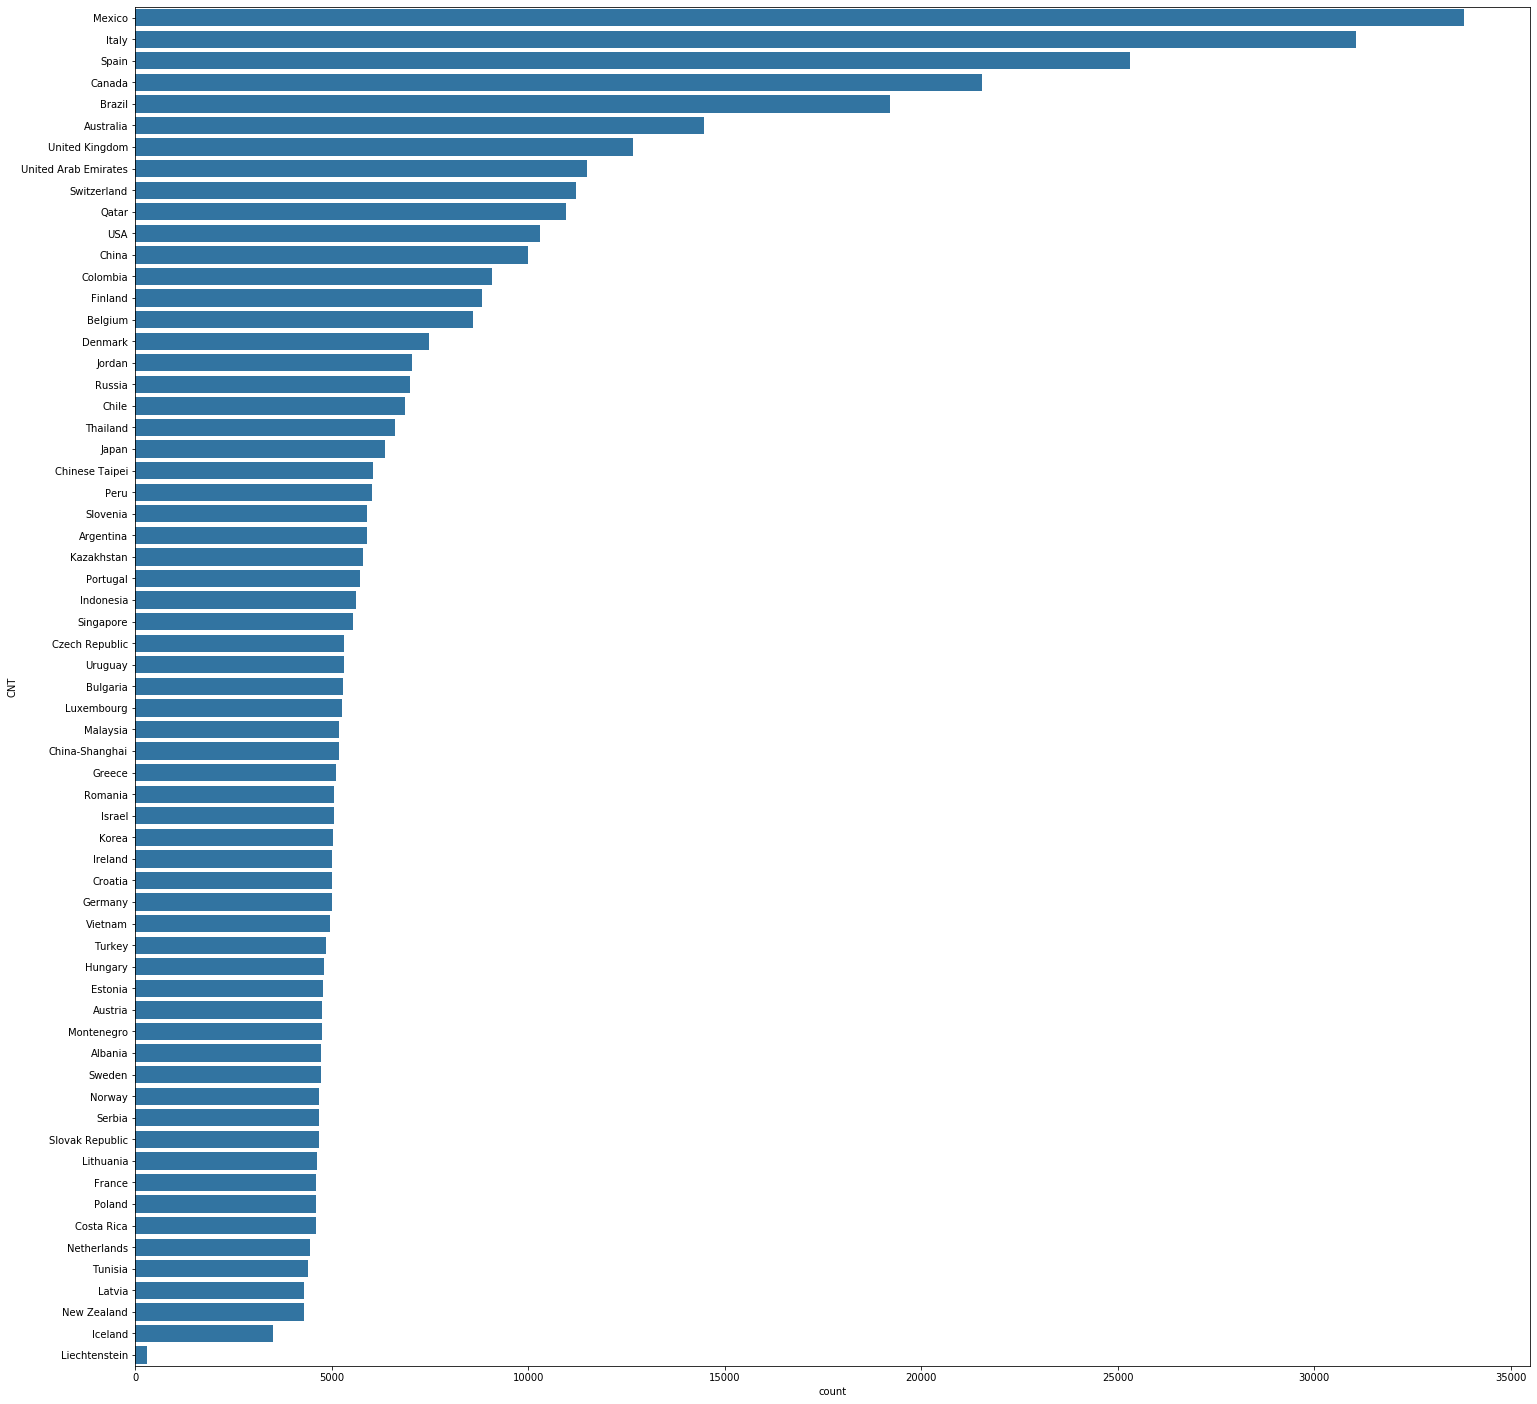

In [55]:
# increasing figsize
rcParams['figure.figsize'] = 25,25

# ordering the countries by frequency
freq = pisa['CNT'].value_counts()
gen_order = freq.index

# setting base color to blue
base_color = sb.color_palette()[0]

# plotting the bar chart horizontally for better reading the countries
sb.countplot(data=pisa, y='CNT', color=base_color, order=gen_order);



> The most students participated in this study are from Mexico, Italy, Spain, Canada and Brazil. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In the 'International Grades' data were some outliers with the value of 96 whereas the mean was 9.8 and the standard deviation 3.7. In the histogram I limited range on the x-axis, so the outliers were hidden and the histogram showed a normal distribution.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were some datapoints in the 'CNT' data separated, even though belonged to the same country. I cleaned that and assigned the data new
- The data for 'Conneticut (USA)', Florida (USA) and 'Massachusetts (USA)' have been assigned to the country 'USA' 
- Perm(Russian Federation) has been assigned to the country 'Russia'
- 'Hong Kong-China' and 'Macao-China' have been assigned to the country 'China'


## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the pisa data
data.

### Correlations between `GRADE` (Grade compared to modal grade in country) and `ESCS` (index of economic, social and cultural status)

#### Scatterplot

In [56]:
pisa[['ESCS', 'GRADE']].describe()

,ESCS,GRADE
count,473648.000000,484617.000000
mean,-0.265546,-0.162964
std,1.131791,0.655558
min,-5.950000,-3.000000
25%,-1.000000,0.000000
50%,-0.190000,0.000000
75%,0.610000,0.000000
max,3.690000,3.000000


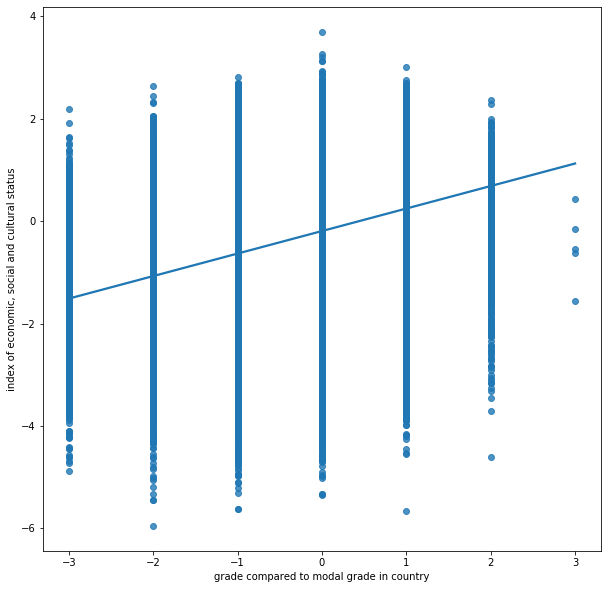

In [57]:
# Scatter plot between grade compared to modal grade in country and index of economic, social and cultural status
rcParams['figure.figsize'] = 10,10
sb.regplot(data = pisa, x = 'GRADE', y = 'ESCS');
plt.xlabel('grade compared to modal grade in country')
plt.ylabel('index of economic, social and cultural status');

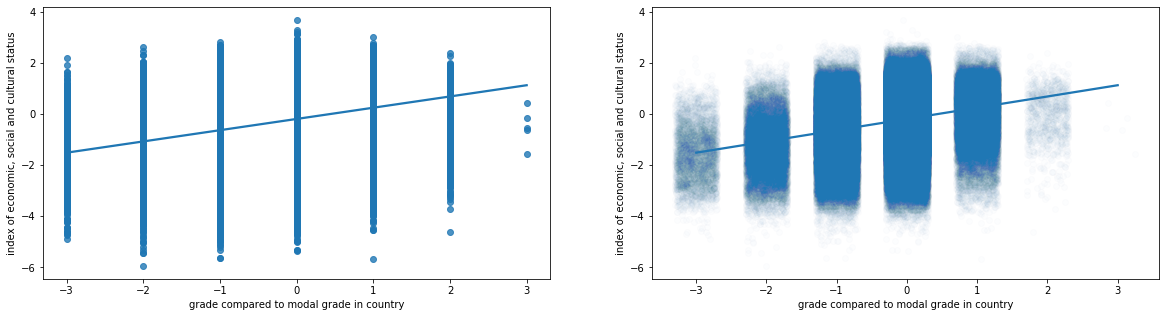

In [58]:
# plotting the original and the new scatterplot with jitter and transparency next to each other using subplot
plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)
rcParams['figure.figsize'] = 10,10
sb.regplot(data = pisa, x = 'GRADE', y = 'ESCS');
plt.xlabel('grade compared to modal grade in country')
plt.ylabel('index of economic, social and cultural status');

plt.subplot(1,2,2)
sb.regplot(data = pisa, x = 'GRADE', y = 'ESCS', x_jitter = 0.3, 
           scatter_kws = {'alpha': 1/100});
plt.xlabel('grade compared to modal grade in country')
plt.ylabel('index of economic, social and cultural status');

#### Heatmap

> I will emphasize the relationship between the two variables by creating a heatmap

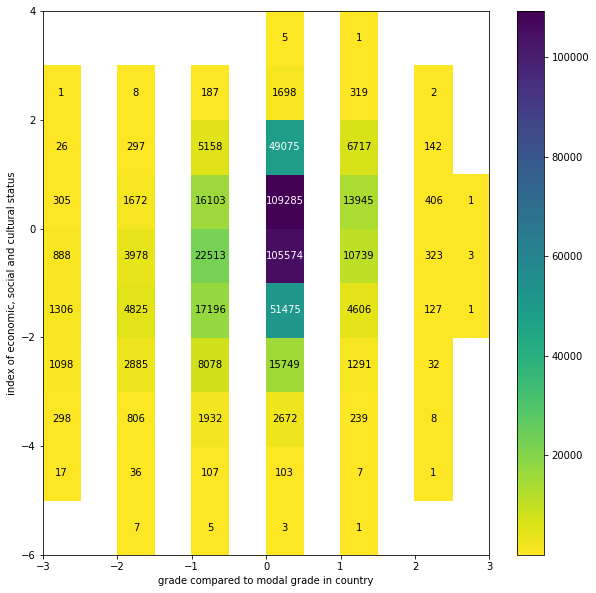

In [75]:
# Specify bin edges 
bins_x = np.arange(-3, 3+0.5, 0.5)
bins_y = np.arange(-6, 4+1, 1)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 

h2d = plt.hist2d(data = pisa, x = 'GRADE', y = 'ESCS', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('grade compared to modal grade in country')
plt.ylabel('index of economic, social and cultural status');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 40000: # increase visibility on darker cells
            plt.text(bins_x[i]+0.25, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.25, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

> All the plots in this section indicate a slightly positive correlation between 'grade compared to modal grade in country' and 'index of economic, social and cultural status'. For better visibility I added some jitter to the x-axis and worked with transparency in the scatterplots.

### Correlations between `IMMIG` and `ESCS`

I will use a violin and boxplots to show how the distribution of the index of economic, social and cultural status (quantitative) is distributed within the immigration stati (qualitative).

#### violin plot

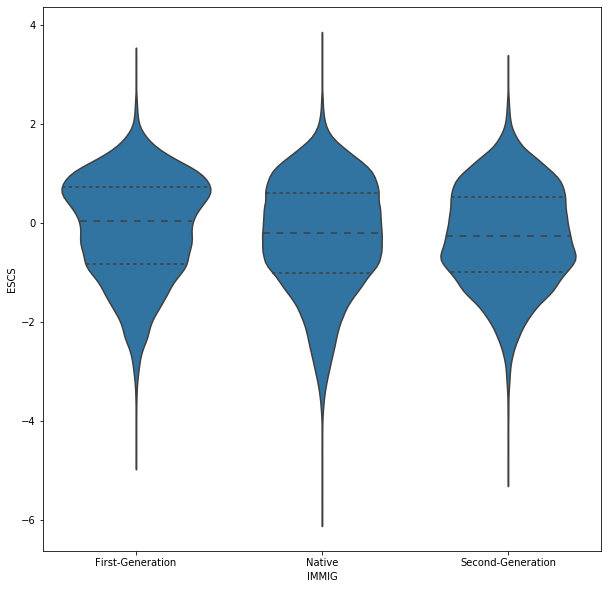

In [211]:
# plotting the violinplot with quartile lines
sb.violinplot(data = pisa, x = 'IMMIG', y = 'ESCS', color = base_color, inner = 'quartiles');

> The plot indicates that the students with first generation immigration status have most of the index scores distributed between 0.5 and 1 whereas the native students and second generation immigration students have their maximum of indices distributed at an index between -0.5 and -1. This leads to the conclusion that first generation immigrants have a higher chance to have a higher economic, social and cultural status than native students or second generation immigrants

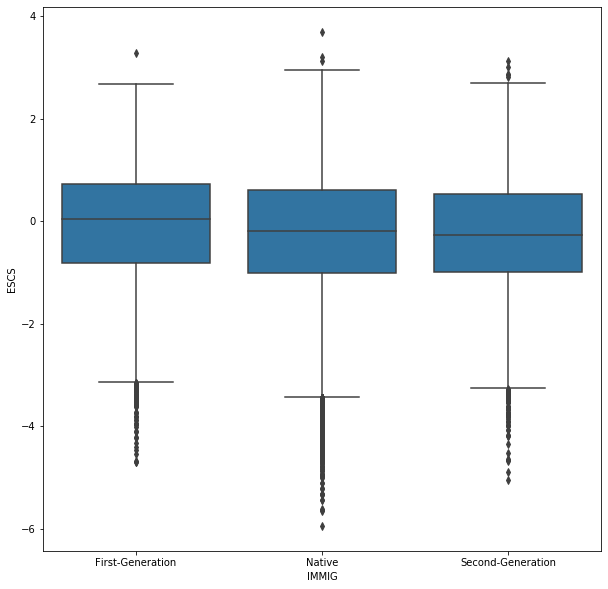

In [212]:
# plotting a boxplot to confirm the findings with the violin plot
sb.boxplot(data = pisa, x = 'IMMIG', y = 'ESCS', color = base_color);

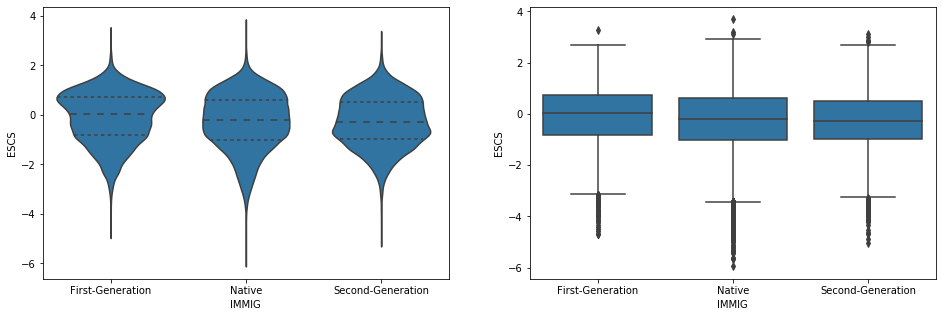

In [213]:
# plotting both next to each other for better comparism
plt.figure(figsize = [16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
sb.violinplot(data = pisa, x = 'IMMIG', y = 'ESCS', color = base_color, inner = 'quartiles');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = pisa, x = 'IMMIG', y = 'ESCS', color = base_color);

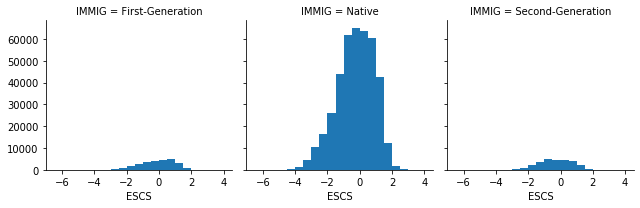

In [119]:
# Plot the Seaborn's FacetGrid
bin_edges = np.arange(-6.5, pisa['ESCS'].max()+0.5, 0.5)

g = sb.FacetGrid(data = pisa, col = 'IMMIG')
g.map(plt.hist, "ESCS", bins = bin_edges);

### Correlations between `IMMIG` and `GRADE`

In [193]:
# calculating the mean ESCS for each immigration status and save the immigration stati descending in a new variable 
mean = pisa.groupby(['IMMIG']).mean()['GRADE'].sort_values(ascending = False)
gen_order = mean.index
mean

IMMIG
Second-Generation   -0.129703
Native              -0.149661
First-Generation    -0.274921
Name: GRADE, dtype: float64

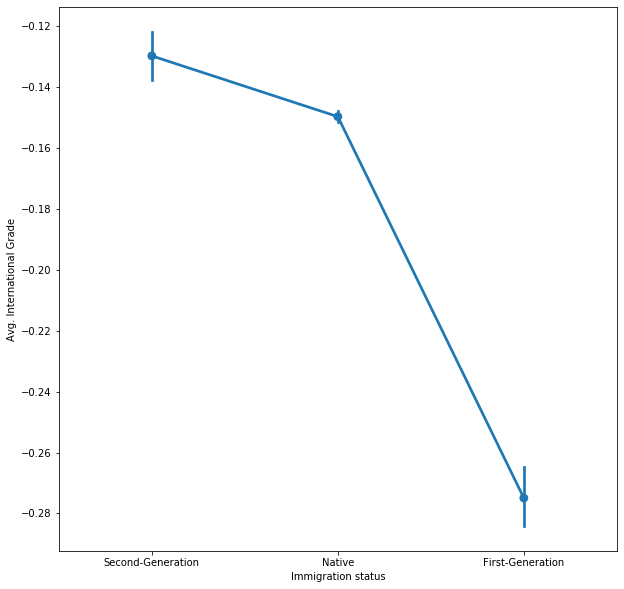

In [217]:
# get the means and standard deviations of the ESCS on a pointplot per immigration status
rcParams['figure.figsize'] = 10,10
sb.pointplot(data = pisa, x = 'IMMIG', y = 'GRADE', color = base_color, order = gen_order);
plt.xlabel('Immigration status')
plt.ylabel('Avg. Grade compared to modal grade in country');

> Students with second-generation immigration status have on average significantly higher grades compared to modal grades in the country (`GRADE`) than the native and the first-generation immigration students. 

### Correlations between `OECD` (OECD Countries) and `ST01Q01` (International Grade)

#### Pointplot

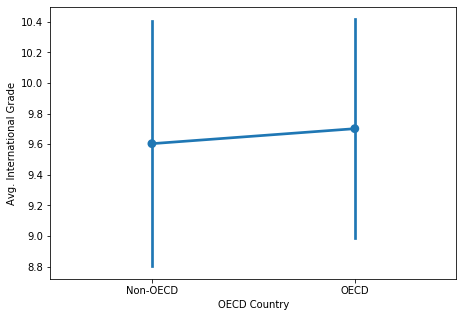

In [218]:
plt.figure(figsize = [16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
sb.pointplot(data = pisa, x = 'OECD', y = 'ST01Q01', color = base_color, ci = 'sd');
plt.xlabel('OECD Country');
plt.ylabel('Avg. International Grade');

# RIGHT plot: box plot
# plt.subplot(1, 2, 2)
# sb.boxplot(data = pisa, x = 'OECD', y = 'ST01Q01', color = base_color);

> The differences in the international grade are not as big as expected. Students of OECD countries have a slightly higher chance of getting a higher International score.

#### Heatmap

In [103]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = pisa.groupby(['ST01Q01', 'OECD']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,ST01Q01,OECD,count
0,7,Non-OECD,2221
1,7,OECD,983
2,8,Non-OECD,10056
3,8,OECD,12170
4,9,Non-OECD,62836
5,9,OECD,83119
6,10,Non-OECD,86578
7,10,OECD,165861
8,11,Non-OECD,16628
9,11,OECD,20507


In [107]:
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'ST01Q01', columns = 'OECD', values = 'count')

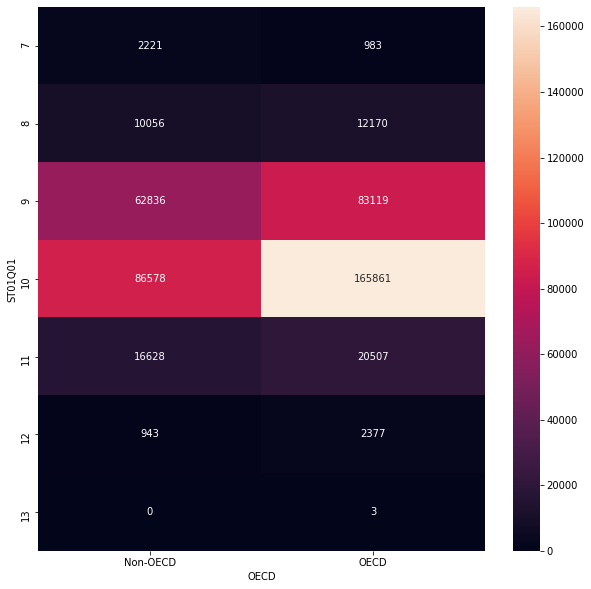

In [110]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');

### Correlations between `CNT` (country) and `ST01Q01`

#### Pointplot

In [155]:
# calculating the mean ST01Q01 for each country and save the countries descending in a new variable 
mean = pisa.groupby(['CNT']).mean()['ST01Q01'].sort_values(ascending = False)
gen_order = mean.index
mean

CNT
United Kingdom    11.156998
New Zealand       10.992733
Brazil            10.167257
USA               10.083961
Australia         10.078996
                    ...    
Poland             8.961632
Latvia             8.879663
Denmark            8.823635
Finland            8.816232
Estonia            8.794938
Name: ST01Q01, Length: 62, dtype: float64

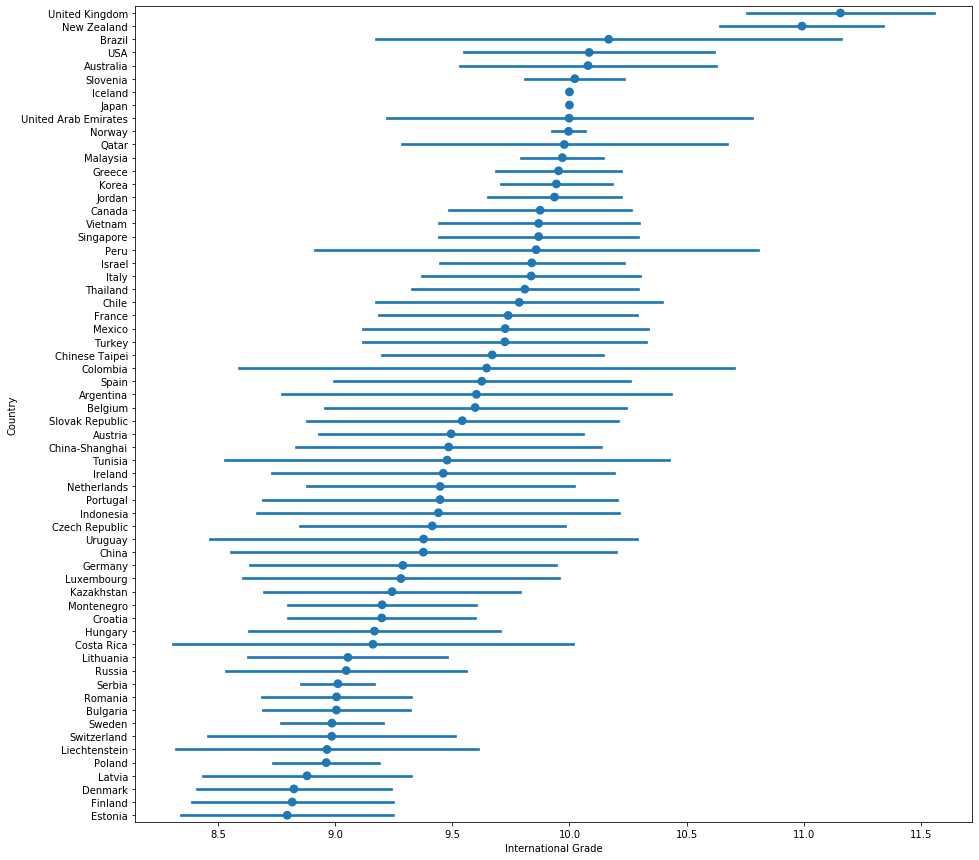

In [153]:
# get the means and standard deviations of the international grade on a pointplot per country
# convert ST01Q01 back to int to calclate the mean and std
rcParams['figure.figsize'] = 15,15
pisa['ST01Q01'] = pisa['ST01Q01'].astype(int) 
sb.pointplot(data = pisa, y = 'CNT', x = 'ST01Q01', color = base_color, ci = 'sd', linestyles = '', order = gen_order);
plt.xlabel('International Grade')
plt.ylabel('Country');

> United Kingdom is leading the international grade scale with the mean grade of 11.16 just before New Zealand with a mean grade of 11. Third place with quite a distance to New Zealand is brazil with a mean international grade of 10.17.

### Correlation between `OECD` and `IMMIG`



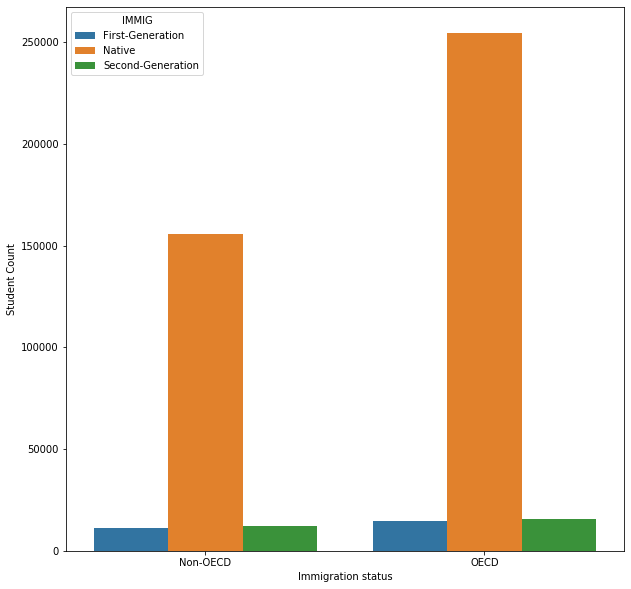

In [210]:
rcParams['figure.figsize'] = 10,10
sb.countplot(data = pisa, x = 'OECD', hue = 'IMMIG');
plt.xlabel('Immigration status')
plt.ylabel('Student Count');

> The clustered bar charts indicate that the proportion of native students is apparently higher in OECD countries than in Non-OECD countries. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The plots between `GRADE` (grade compared to modal grade in country) and `ESCS` (Index of economic, social and cultural status) indicates a slightly positive correlation. 

> The violine plots and the boxplots for the comparism between `IMMIG`(Immigration status) and `ESCS` indicate that the students with first generation immigration status have most of the index scores distributed between 0.5 and 1 whereas the native students and second generation immigration students have their maximum of indices distributed at an index between -0.5 and -1. This leads to the conclusion that first generation immigrants have a higher chance to have a higher economic, social and cultural status than native students or second generation immigrants

> United Kingdom is leading the international grade scale (`ST01Q01`) with the mean grade of 11.16 just before New Zealand with a mean grade of 11. Third place with quite a distance to New Zealand is brazil with a mean international grade of 10.17.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The clustered bar charts that compare the count of students in `OECD` vs `Non-OECD` countries clustered by immigration status (`IMMIG`) indicate that the proportion of native students is apparently higher in OECD countries than in Non-OECD countries. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

# Sources

- https://knowledge.udacity.com/questions/135696